Import package

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler


C:\Users\GIANG\AppData\Local\Temp\ipykernel_8524\987588844.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Read data

In [2]:
data="data.json"
with open(data,'r') as file:
  data=json.load(file)

In [3]:
keys=data.keys()
list_key=list(keys)

In [4]:
stock_train=data['ACB']
type(stock_train)

dict

In [5]:
#convert dict to dataframe
from ast import literal_eval  
def convert_str_to_float(str_num):
    return float(str_num.replace(',', ''))
data_dict = {key: literal_eval(value) for key, value in stock_train.items()}
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.index = pd.to_datetime(df.index, format='%d/%m/%Y')
df = df.map(convert_str_to_float)
df=df.sort_index(ascending=True)

In [6]:
df


,open,high,low,close,volume
2021-11-09,22320.0,22587.0,22286.0,22353.0,6598500.0
2021-11-10,22386.0,22420.0,22152.0,22320.0,5794500.0
2021-11-11,22253.0,22420.0,21718.0,22052.0,7503700.0
2021-11-12,22052.0,22286.0,21818.0,22286.0,17087412.0
2021-11-15,22320.0,22453.0,22219.0,22320.0,5435700.0
...,...,...,...,...,...
2024-02-16,27500.0,27600.0,27300.0,27600.0,9495400.0
2024-02-19,27700.0,27700.0,27200.0,27700.0,11856900.0
2024-02-20,27500.0,27750.0,27350.0,27550.0,7316400.0
2024-02-21,27500.0,27900.0,27400.0,27700.0,10251900.0


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 570 entries, 2021-11-09 to 2024-02-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    570 non-null    float64
 1   high    570 non-null    float64
 2   low     570 non-null    float64
 3   close   570 non-null    float64
 4   volume  570 non-null    float64
dtypes: float64(5)
memory usage: 26.7 KB
None
               open          high           low         close        volume
count    570.000000    570.000000    570.000000    570.000000  5.700000e+02
mean   21345.387719  21573.343860  21111.891228  21331.980702  6.457273e+06
std     1994.071256   1970.326041   2031.899244   2009.391929  4.683361e+06
min    14952.000000  15620.000000  14576.000000  14618.000000  7.580000e+05
25%    20382.000000  20549.000000  20131.000000  20262.250000  3.370840e+06
50%    21600.000000  21750.000000  21325.000000  21600.000000  5.255700e+06
75%    22386.000000  22550.000000  22152

Data visualization

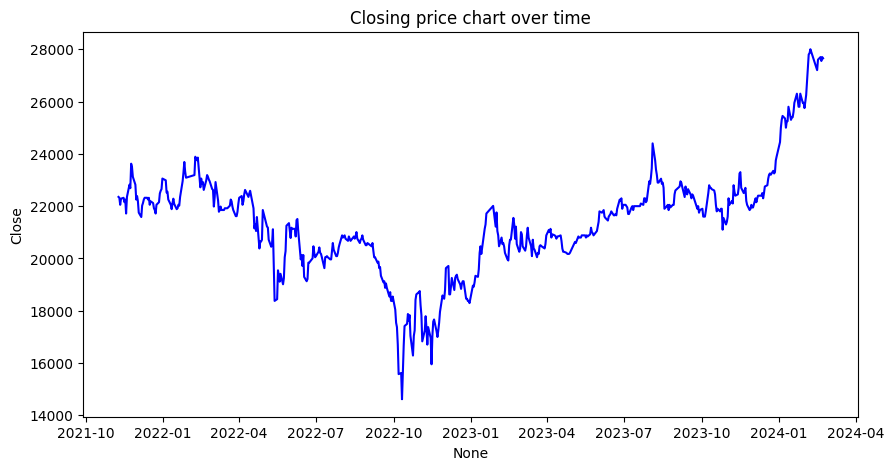

In [8]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df.index, y='close', data=df, ax=axes, color='blue')
axes.set_title('Closing price chart over time')
axes.set_ylabel('Close')

plt.show()


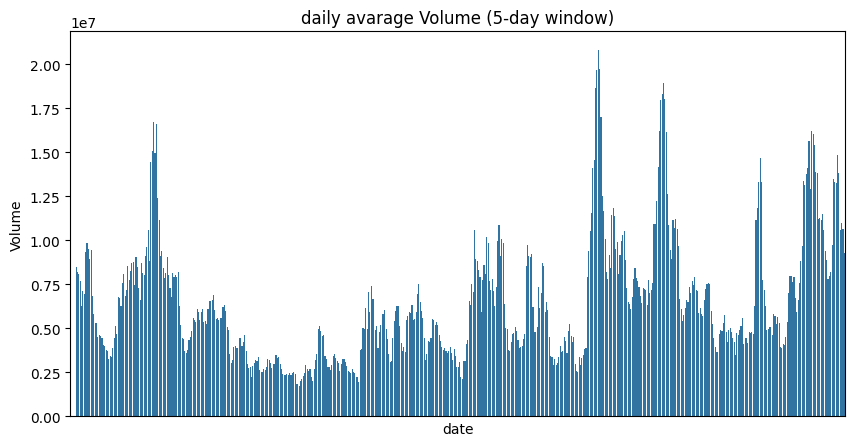

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
rolling_avg = df['volume'].rolling(window=5).mean()
sns.barplot(x=df.index, y=rolling_avg)
plt.xticks([]) 
plt.xlabel('date')
plt.title('daily avarage Volume (5-day window)')
plt.ylabel('Volume')
plt.show()
# sử dụng giá trị trung bình trượt 30 ngày là để làm mịn biểu đồ, giảm nhiễu và làm cho xu hướng dễ nhận biết hơn

In [11]:
import plotly.graph_objects as go
import plotly.io as pio
#SMA chart plotting for 5, 20, 50, 75 day moving averages
df['EMA5'] = df.close.ewm(span=5, adjust=False).mean()
df['EMA20'] = df.close.ewm(span=20, adjust=False).mean()
df['EMA50'] = df.close.ewm(span=50, adjust=False).mean()
df['EMA75'] = df.close.ewm(span=75, adjust=False).mean()
price_trace = go.Scatter(x=df.index, y=df['close'], line=dict(color='black', width=1), name="Price")

fig = go.Figure(data=[
    go.Ohlc(x=df.index,
            open=df['open'],
            high=df['high'],
            low=df['low'],
            close=df['close'], name="OHLC"),
    go.Scatter(x=df.index, y=df['EMA5'], line=dict(color='orange', width=1), name="EMA5"),
    go.Scatter(x=df.index, y=df['EMA20'], line=dict(color='green', width=1), name="EMA20"),
    go.Scatter(x=df.index, y=df['EMA50'], line=dict(color='blue', width=1), name="EMA50"),
    go.Scatter(x=df.index, y=df['EMA75'], line=dict(color='violet', width=1), name="EMA75"),
    price_trace  
])

pio.show(fig)

Khi EMA nhanh cắt EMA chậm theo hướng đi xuống: tín hiệu cho thấy giá thị trường đang giảm, nên đặt lệnh bán tại điểm giao cắt này.
Khi EMA nhanh cắt EMA chậm theo hướng đi lên: tín hiệu về sự tăng giá trên thị trường, nên tiến hành mua tại điểm giao cắt này.
=> gán nhãn những điểm cắt, là những điểm bắt đầu cho các xu hướng


In [ ]:
#Create a column on daily change percentages for the Stock
df['daily_change_pct'] = df['close'].pct_change()*100
df.head()

,open,high,low,close,volume,SMA5,SMA20,SMA50,SMA75,EMA5,EMA20,EMA50,EMA75,daily_change_pct
2021-10-29,21284.0,22052.0,21217.0,22052.0,15872550.0,NaN,NaN,NaN,NaN,22052.000000,22052.000000,22052.000000,22052.000000,NaN
2021-11-01,21919.0,21985.0,21651.0,21852.0,5598300.0,NaN,NaN,NaN,NaN,21985.333333,22032.952381,22044.156863,22046.736842,-0.906947
2021-11-02,21852.0,22152.0,21752.0,22152.0,7958700.0,NaN,NaN,NaN,NaN,22040.888889,22044.290249,22048.386005,22049.506925,1.372872
2021-11-03,22253.0,22787.0,22219.0,22620.0,13293500.0,NaN,NaN,NaN,NaN,22233.925926,22099.119749,22070.802240,22064.519901,2.112676
2021-11-04,22754.0,22754.0,22353.0,22386.0,5335800.0,22212.4,NaN,NaN,NaN,22284.617284,22126.441678,22083.162937,22072.979903,-1.034483


In [ ]:

df['daily_change_pct'].fillna(0)
df['daily_change_pct'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily Change Percentage')
plt.ylabel('Frequency')
plt.show()
#print the statistics on daily change percentage
df.daily_change_pct.describe()